# Problem Statement:

** Explore the datasets and develop a model to predict customer churn over time. **

**By:** Yusuf Firoz

## Step 3. Model Building and Prediction

**I have used following supervised learning algorithms.**

***Random Forest Classifier***
* It forms a tree by selecting subsets of data randomly. This Process is repeated many times until it becomes a forest. Then decision is made on the basis of predictions from different trees.
* It can easily deal with big dataset and gives better accuracy.
* I believe this is a good model for the data.


***Logistic Regression***
* It is one of the simple and fast supervised algorithms.

***Stochastic Gradient Descent Classifier***
* Its beauty is that it is way faster than most of the supervised algorithms.


** Import required libraries**

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from time import time
import pickle

In [3]:
import matplotlib.pylab as plt
from IPython.display import display 
%matplotlib inline


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, auc, precision_score, recall_score, roc_curve, f1_score, roc_auc_score, classification_report


In [6]:
final = pd.read_pickle('final.pickle')

## Data preparation for training

In [8]:
#Create a copy of final dataset
final_copy = final.copy()

**Create Predictor(X) and Dependent(Y) variable ** 

In [10]:
# Create Predictor(X) and Dependent(Y) variable
Y = final_copy[['churn_status']].values.ravel() 
X = final_copy.drop('churn_status', axis=1).values.astype('float64')


**Normalise data for better models**

In [13]:
# Perform normalization of datsset
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Splitting data into training and testing dataset**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

print ("Size of training set: {}.".format(X_train.shape[0]))
print ("Size of testing set: {}.".format(X_test.shape[0]))

Size of training set: 551072.
Size of testing set: 236174.


### Random Forest Classifier

**Training and Prediction**

In [15]:
clf_RFC = RandomForestClassifier(n_estimators=100)  
clf_RFC.fit(X_train, y_train) 
y_pred_RFC = clf_RFC.predict(X_test)

print("Random Forest Classifier")
print("AUC ROC: {}".format(roc_auc_score(y_test, y_pred_RFC)))

Random Forest Classifier
AUC ROC: 1.0


**Validation**

In [16]:
print("Accuracy for train dataset: {}".format(clf_RFC.score(X_train, y_train)))
print("Accuracy for test dataset: {}".format(clf_RFC.score(X_test, y_test)))

print("F1 Score: {}".format(f1_score(y_test, y_pred_RFC)))
print("Precision: {}".format(precision_score(y_test, y_pred_RFC)))
print("Recall: {}".format(recall_score(y_test, y_pred_RFC)))

# Check ROC AUC with Cross Validation
cross_val_score(clf_RFC, X_train, y_train, cv=3, scoring="roc_auc")

Accuracy for train dataset: 1.0
Accuracy for test dataset: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0


array([1., 1., 1.])

In [17]:
print('=====================================================')
print('Classification report:')
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred_RFC))
print('=====================================================')
print('Confusion matrix:')
print('-----------------------------------------------------')
print(confusion_matrix(y_test, y_pred_RFC))
print('=====================================================')

Classification report:
-----------------------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     18763
          1       1.00      1.00      1.00    217411

avg / total       1.00      1.00      1.00    236174

Confusion matrix:
-----------------------------------------------------
[[ 18763      0]
 [     0 217411]]


### Logistic Regression Model

**Training and Prediction**

In [18]:
clf_LR = LogisticRegression(random_state=0)        
clf_LR.fit(X_train, y_train) 
y_pred_LR = clf_LR.predict(X_test)

print("LogisticRegression Classifier")
print("AUC ROC: {}".format(roc_auc_score(y_test, y_pred_LR)))

LogisticRegression Classifier
AUC ROC: 0.9999977002083611


**Validation**

In [20]:
print("Accuracy for train dataset: {}".format(clf_LR.score(X_train, y_train)))
print("Accuracy for test dataset: {}".format(clf_LR.score(X_test, y_test)))

print("F1 Score: {}".format(f1_score(y_test, y_pred_LR)))
print("Precision: {}".format(precision_score(y_test, y_pred_LR)))
print("Recall: {}".format(recall_score(y_test, y_pred_LR)))

# Check ROC AUC with Cross Validation
cross_val_score(clf_LR, X_train, y_train, cv=3, scoring="roc_auc")

Accuracy for train dataset: 0.9999981853550897
Accuracy for test dataset: 0.999995765833665
F1 Score: 0.999997700203072
Precision: 1.0
Recall: 0.9999954004167222


array([1.        , 1.        , 0.99999995])

In [21]:
print('=====================================================')
print('Classification report:')
print('-----------------------------------------------------')
print(classification_report(y_test, clf_LR.predict(X_test)))
print('=====================================================')
print('Confusion matrix:')
print('-----------------------------------------------------')
print(confusion_matrix(y_test, clf_LR.predict(X_test)))
print('=====================================================')

Classification report:
-----------------------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     18763
          1       1.00      1.00      1.00    217411

avg / total       1.00      1.00      1.00    236174

Confusion matrix:
-----------------------------------------------------
[[ 18763      0]
 [     1 217410]]


### Stochastic Gradient Descent Classifier (SGDC)

**Training and Prediction**

In [22]:
clf_SGDC = SGDClassifier(random_state=0)
clf_SGDC.fit(X_train, y_train) 
y_pred_SGDC = clf_SGDC.predict(X_test)

print("Stochastic Gradient Descent Classifier")
print("AUC ROC: {}".format(roc_auc_score(y_test, y_pred_SGDC)))

Stochastic Gradient Descent Classifier
AUC ROC: 0.9999733518094122


**Validation**

In [23]:
print("Accuracy for train dataset: {}".format(clf_SGDC.score(X_train, y_train)))
print("Accuracy for test dataset: {}".format(clf_SGDC.score(X_test, y_test)))

print("F1 Score: {}".format(f1_score(y_test, y_pred_SGDC)))
print("Precision: {}".format(precision_score(y_test, y_pred_SGDC)))
print("Recall: {}".format(recall_score(y_test, y_pred_SGDC)))

# Check ROC AUC with Cross Validation
cross_val_score(clf_SGDC, X_train, y_train, cv=3, scoring="roc_auc")

Accuracy for train dataset: 0.9999927414203589
Accuracy for test dataset: 0.999995765833665
F1 Score: 0.9999977002136502
Precision: 0.9999954004378783
Recall: 1.0


array([1.        , 0.99999999, 1.        ])

In [24]:
print('=====================================================')
print('Classification report:')
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred_SGDC))
print('=====================================================')
print('Confusion matrix:')
print('-----------------------------------------------------')
print(confusion_matrix(y_test, y_pred_SGDC))
print('=====================================================')

Classification report:
-----------------------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     18763
          1       1.00      1.00      1.00    217411

avg / total       1.00      1.00      1.00    236174

Confusion matrix:
-----------------------------------------------------
[[ 18762      1]
 [     0 217411]]


### Plot importance features

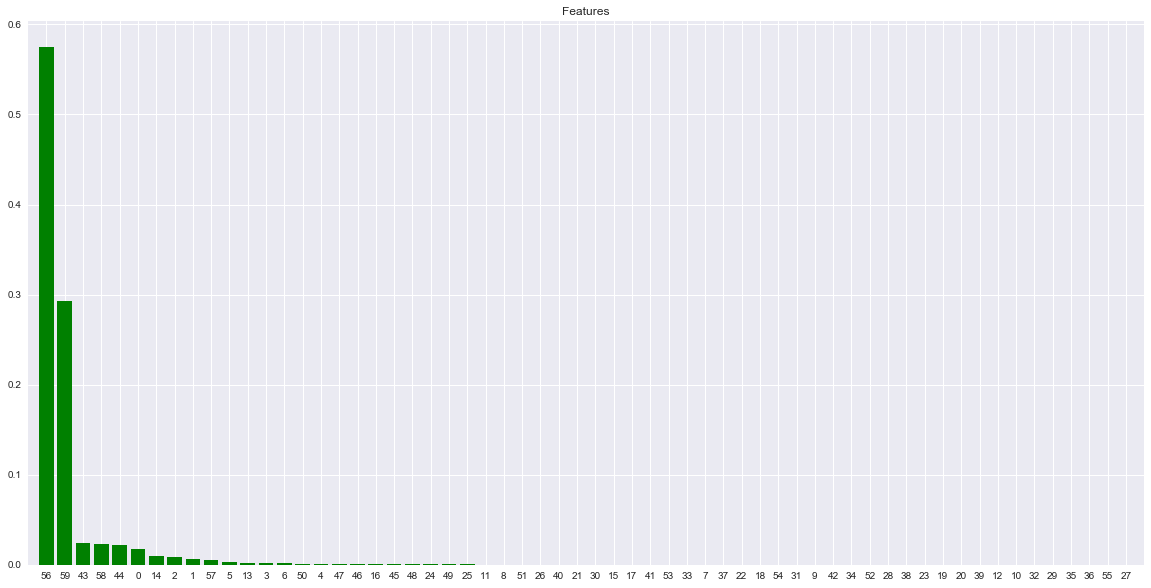

In [26]:
top_features = clf_RFC.feature_importances_
std = np.std([clf_RFC.feature_importances_ for tree in clf_RFC.estimators_], axis=0)
pos = np.argsort(top_features)[::-1]

# Plotting the important feature of the random forest
plt.figure(figsize=(20, 10))
plt.bar(range(X.shape[1]), top_features[pos],color="g", yerr=std[pos], align="center")
plt.xticks(range(X.shape[1]), pos)
plt.xlim([-1, X.shape[1]])
plt.title("Features")
plt.show()

In [30]:
important_features = list(final_copy.drop('churn_status', axis=1).iloc[:,[56,59,43,58,44,0,14,2,1,57,5,13,3,6,50,4,47,46,16,45,48,24,49,25]].columns)

In [36]:
important_features[:12]

['Total_cancellation',
 'Gap_of_Cancellation',
 'Total_no_of_Pauses',
 'Total_delivery_duration',
 'Total_pause_duration',
 'No_of_boxes',
 'channel16',
 'type2',
 'type1',
 'Total_reactivation',
 'type5',
 'channel15']

# Conclusion

### Accuracy Table:

|     Algorithm     | Random Forest Classifier | Logistic Regression | Stochastic Gradient Descent Classifierl |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| AUC ROC |    1.0              |      0.9999             |      0.9999           |
| F1 Score        |      1.0                 |      0.9999             |   0.9999       |
| Precision        |      1.0                 |      1.0             |   0.9999       |
| Recall        |      1.0                 |      0.9999             |   1.0       |



Random Forest Classifier is giving the best accuracy i.e. 100%. Other two classifiers are also approximately 100% efficient.

**Factors affecting the Customer Churn:**

**From the top features we can conclude that following features are playing role in the customer churn.**
* **Total_cancellation:** Customers are more prone to churn if they have cancelled before. 
* **Gap_of_Cancellation:** Duration between cancellation date and last delivery date.
* **Total_no_of_Pauses:** Total no of pauses taken by subscriber before cancellation.
* **Total_delivery_duration:** Duration between the first and last delivery.
* **Total_pause_duration:** Duration between the first and last pause.
* **No_of_boxes:** No of boxes delivered to the customer.
* **channel16 & channel15:** Customers coming from **channel15** and **channel16** are more prone to churn.
* **type2, type5 & type1:** Customers who recieved box type **type2**, **type5** & **type1** are more prone to churn.
* **Total_reactivation:** No. of times customers reactivated the subscription before.


# Thanks